Roll NO : 31413
Batch : K4
Data Analytics II
1. Implement logistic regression using Python/R to
 perform classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN,
Accuracy, Error rate, Precision,
Recall on the given dataset.

In [1]:
#step 1 Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#step 2 load
data = pd.read_csv('Social_Network_Ads.csv')

#step 3 data exploration
print(data.head())




    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [10]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# Step 4: Preprocessing the data
# We need to split the data into features (X) and target variable (y)
X = data[['Age', 'EstimatedSalary']]  
y = data['Purchased'] 

In [7]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:

# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Step 5: Train the Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [12]:
# Step 6: Make predictions
y_pred = classifier.predict(X_test)

In [18]:
# Step 7: Confusion Matrix and related metrics
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[57  1]
 [ 5 17]]


In [14]:
# Extract TP, TN, FP, FN from the confusion matrix
TN, FP, FN, TP = cm.ravel()

In [19]:

# Accuracy, Error Rate, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [20]:
# Output the metrics
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


True Positive (TP): 17
False Positive (FP): 1
True Negative (TN): 57
False Negative (FN): 5
Accuracy: 0.925
Error Rate: 0.07499999999999996
Precision: 0.9444444444444444
Recall: 0.7727272727272727
F1 Score: 0.85


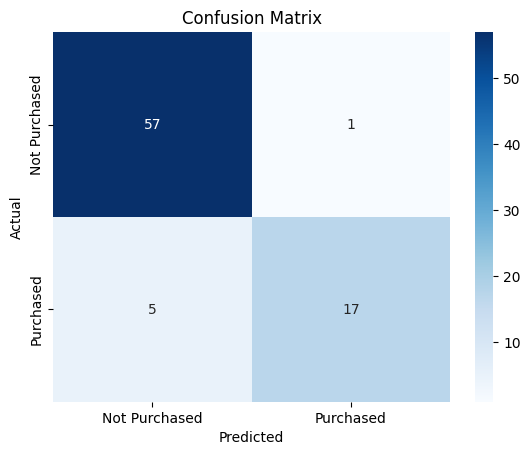

In [17]:
# Step 8: Visualize the confusion matrix (optional)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()